<a href="https://colab.research.google.com/github/EricEsajian/deep_learning_models/blob/master/RNN_Recurrent_Neural_Network_%26_LSTM_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(0,50,501)

In [28]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [0]:
y = np.sin(x)

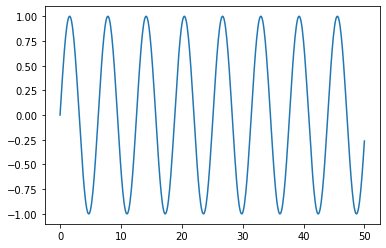

In [30]:
plt.plot(x,y)

In [0]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [32]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [33]:
len(df)

501

In [0]:
test_percent = 0.1

In [35]:
len(df)*test_percent

50.1

In [0]:
test_point = np.round(len(df)*test_percent)

In [37]:
test_point

50.0

In [0]:
test_ind = int(len(df)-test_point)

In [39]:
test_ind

451

In [0]:
train = df.iloc[:test_ind]

In [0]:
test = df.iloc[test_ind:]

In [42]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [43]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [46]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
# !pip install --upgrade tensorflow

In [0]:
# help(TimeseriesGenerator)

In [0]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [60]:
len(scaled_train)

451

In [61]:
len(generator)

447

In [0]:
X,y = generator[0]

In [63]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041]]])

In [64]:
y

array([[0.69470985]])

In [65]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


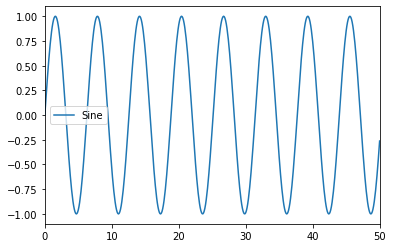

In [66]:
df.plot()

In [0]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [0]:
n_features = 1

In [0]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 5s 12ms/step - loss: 0.0114
Epoch 2/5
401/401 [==============================] - 4s 11ms/step - loss: 7.5707e-05
Epoch 3/5
401/401 [==============================] - 4s 11ms/step - loss: 5.5018e-04
Epoch 4/5
401/401 [==============================] - 4s 11ms/step - loss: 8.3629e-05
Epoch 5/5
401/401 [==============================] - 4s 10ms/step - loss: 8.5587e-06


In [0]:
losses = pd.DataFrame(model.history.history)

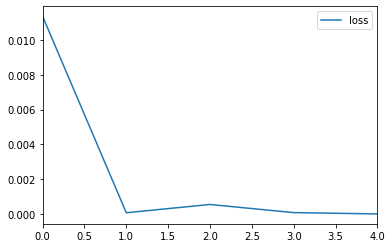

In [78]:
losses.plot()

In [0]:
first_eval_batch = scaled_train[-length:]

In [0]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [82]:
model.predict(first_eval_batch)

array([[0.9486708]], dtype=float32)

In [83]:
scaled_test[0]

array([0.94955134])

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [0]:
# current_batch

In [0]:
# first_eval_batch

In [87]:
# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
# test_predictions

In [0]:
# scaled_test

In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [94]:
true_predictions

array([[ 0.89733618],
       [ 0.93525325],
       [ 0.96377694],
       [ 0.98237106],
       [ 0.99157144],
       [ 0.99034156],
       [ 0.97908174],
       [ 0.9581782 ],
       [ 0.927437  ],
       [ 0.88729085],
       [ 0.83806126],
       [ 0.77982251],
       [ 0.71373162],
       [ 0.64023921],
       [ 0.55989863],
       [ 0.47439145],
       [ 0.38405704],
       [ 0.28959135],
       [ 0.19224404],
       [ 0.0927269 ],
       [-0.00782044],
       [-0.10849391],
       [-0.2084827 ],
       [-0.30684358],
       [-0.40249831],
       [-0.49464099],
       [-0.58205351],
       [-0.66384065],
       [-0.73936646],
       [-0.80722939],
       [-0.86684606],
       [-0.9177542 ],
       [-0.95870801],
       [-0.98930144],
       [-1.00927358],
       [-1.01838418],
       [-1.01681211],
       [-1.00448174],
       [-0.98152721],
       [-0.94850845],
       [-0.90568457],
       [-0.85386419],
       [-0.79389241],
       [-0.72589461],
       [-0.65078456],
       [-0

In [95]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
test

,Sine,Predictions
45.1,0.899097,0.897336
45.2,0.938307,0.935253
45.3,0.968142,0.963777
45.4,0.988304,0.982371
45.5,0.998591,0.991571
45.6,0.998900,0.990342
45.7,0.989229,0.979082
45.8,0.969673,0.958178
45.9,0.940429,0.927437
46.0,0.901788,0.887291


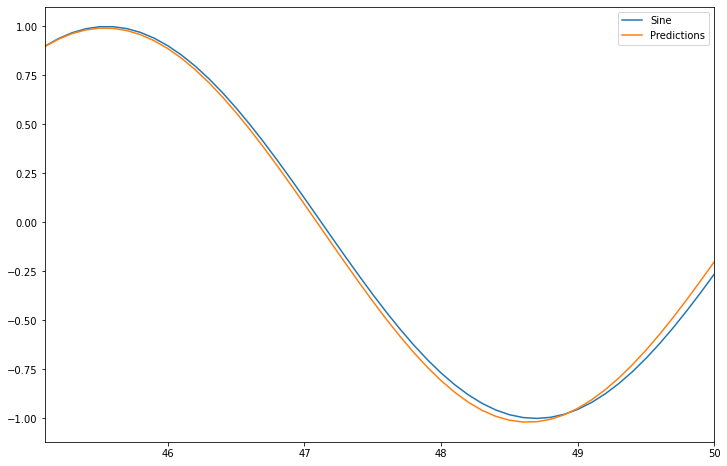

In [97]:
test.plot(figsize=(12,8))

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length,batch_size=1)

In [0]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [104]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 10s 25ms/step - loss: 0.0211 - val_loss: 2.7296e-05
Epoch 2/20
402/402 [==============================] - 9s 21ms/step - loss: 1.3474e-04 - val_loss: 3.7193e-05
Epoch 3/20
402/402 [==============================] - 9s 22ms/step - loss: 8.5115e-05 - val_loss: 1.4242e-07
Epoch 4/20
402/402 [==============================] - 9s 22ms/step - loss: 3.1566e-04 - val_loss: 2.3475e-06
Epoch 5/20
402/402 [==============================] - 9s 22ms/step - loss: 1.2246e-04 - val_loss: 1.3020e-05


In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


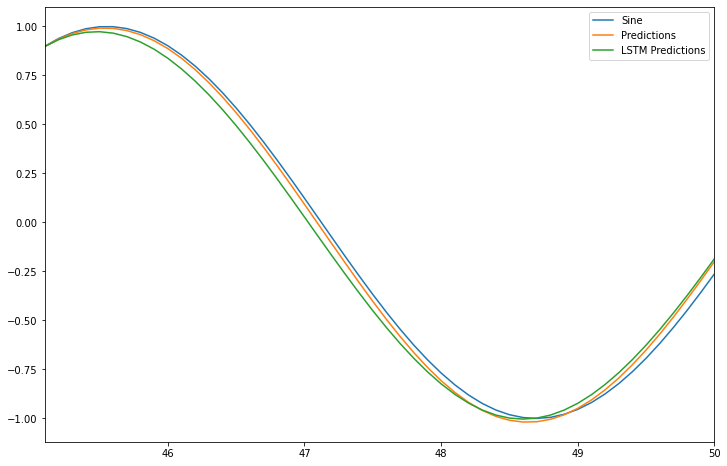

In [107]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [0]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [0]:
# length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [0]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [111]:
model.fit_generator(generator,epochs=6)

  ...
    to  
  ['...']
Train for 452 steps
Epoch 1/6
452/452 [==============================] - 11s 23ms/step - loss: 0.0156
Epoch 2/6
452/452 [==============================] - 10s 22ms/step - loss: 1.7665e-04
Epoch 3/6
452/452 [==============================] - 10s 22ms/step - loss: 2.6641e-04
Epoch 4/6
452/452 [==============================] - 10s 22ms/step - loss: 2.2515e-04
Epoch 5/6
452/452 [==============================] - 10s 22ms/step - loss: 7.3899e-05
Epoch 6/6
452/452 [==============================] - 10s 22ms/step - loss: 2.2073e-04


In [0]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [113]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [0]:
forecast = scaler.inverse_transform(forecast)

In [115]:
# forecast

array([[ 0.91808808],
       [ 0.9571455 ],
       [ 0.98742084],
       [ 1.00822198],
       [ 1.01913836],
       [ 1.01996543],
       [ 1.01066861],
       [ 0.99135233],
       [ 0.96224321],
       [ 0.9236687 ],
       [ 0.87604545],
       [ 0.81986495],
       [ 0.75568616],
       [ 0.68412635],
       [ 0.60585487],
       [ 0.52159235],
       [ 0.43210325],
       [ 0.33819509],
       [ 0.24071534],
       [ 0.14054792],
       [ 0.03861108],
       [-0.06414865],
       [-0.1667568 ],
       [-0.26822026],
       [-0.3675298 ]])

In [0]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [117]:
len(forecast_index)

25

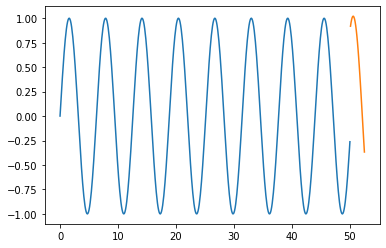

In [118]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)